In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from util import load_data, fdr, plot_report

In [2]:
def load_data(file, num_features=81):
    df = pd.read_csv(file)
    std_scale = StandardScaler().fit(df)
    df_std = pd.DataFrame(std_scale.transform(df), columns=df.columns)

    with open('filter_rank.csv', 'r') as f:
        rank = f.read().split('\n')

    y = df['fraud_label'].to_numpy()
    df_std.drop(columns=['record', 'fraud_label'], inplace=True)

    ks_col = rank[:num_features]
    filter_df = df_std.filter(items=ks_col)
    return filter_df, y

In [3]:
df, y = load_data('vars_308.csv')
df.head()

,fulladdress_day_since,address_day_since,fulladdress_count_30,address_count_30,address_count_14,fulladdress_count_14,address_count_7,fulladdress_count_7,address_count_0_by_14,fulladdress_count_0_by_14,...,fulladdress_homephone_count_0_by_14,homephone_count_7,homephone_count_3,address_count_1_by_7,fulladdress_count_1_by_7,fulladdress_count_0,address_count_0,name_dob_count_3,ssn_count_3,homephone_count_14
0,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308
1,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308
2,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308
3,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308
4,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308


In [4]:
rf = RandomForestClassifier(n_estimators=1000,
                            max_depth=20,
                            max_features=10,
                            ccp_alpha=1e-6,
                            min_samples_leaf=4,
                            n_jobs=4,
                            verbose=1).fit(df, y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   33.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 10.3min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed: 12.9min finished


In [25]:
rf.feature_importances_

array([0.01231375, 0.00722439, 0.10138559, 0.01377044, 0.01845465,
       0.09458207, 0.02598956, 0.08076032, 0.00115822, 0.00563   ,
       0.03745963, 0.01297653, 0.0237414 , 0.00161894, 0.00207718,
       0.00405454, 0.01120416, 0.01765712, 0.00439013, 0.04821183,
       0.05984128, 0.00360873, 0.00311548, 0.01516764, 0.0031522 ,
       0.00319958, 0.00388548, 0.03955015, 0.02821683, 0.05895714,
       0.00290673, 0.03867885, 0.00149195, 0.00237462, 0.01921556,
       0.00431252, 0.01474769, 0.01349907, 0.00253774, 0.00146994,
       0.0075365 , 0.01051128, 0.01127299, 0.0123062 , 0.00414402,
       0.00622206, 0.00370891, 0.00270816, 0.00057364, 0.00092987,
       0.00288851, 0.00265158, 0.00179263, 0.00292367, 0.00228803,
       0.00423894, 0.0029817 , 0.001421  , 0.00352966, 0.00286025,
       0.0024646 , 0.00417709, 0.00315422, 0.00103905, 0.00028932,
       0.00058508, 0.0025973 , 0.00046281, 0.00044786, 0.00171763,
       0.00118319, 0.00923641, 0.01719489, 0.00074002, 0.00105

In [26]:
tree_feature_importances = (rf.feature_importances_)
sorted_idx = tree_feature_importances.argsort()

In [27]:
feature_names = df.columns

In [28]:
feature_names[sorted_idx]

Index(['ssn_count_0_by_14', 'ssn_lastname_count_0_by_14',
       'ssn_firstname_count_0_by_14', 'ssn_count_0_by_30',
       'ssn_dob_count_0_by_14', 'address_count_1_by_7',
       'address_count_1_by_14', 'name_dob_count_0_by_14',
       'fulladdress_count_1_by_7', 'address_count_0_by_14',
       'fulladdress_homephone_count_0_by_14', 'name_count_14', 'name_count_30',
       'address_count_0_by_3', 'address_count_0_by_30', 'name_count_7',
       'fulladdress_count_1_by_14', 'address_count_0_by_7', 'name_dob_count_7',
       'fulladdress_count_0_by_3', 'ssn_dob_count_7', 'name_dob_count_3',
       'ssn_count_3', 'ssn_count_14', 'fulladdress_homephone_count_7',
       'ssn_lastname_count_0_by_30', 'fulladdress_count_1_by_30',
       'ssn_name_dob_count_7', 'ssn_firstname_count_0_by_30',
       'ssn_name_day_since', 'fulladdress_homephone_count_0_by_30',
       'ssn_count_7', 'ssn_day_since', 'ssn_firstname_day_since',
       'ssn_name_count_7', 'ssn_lastname_day_since', 'address_count_0'

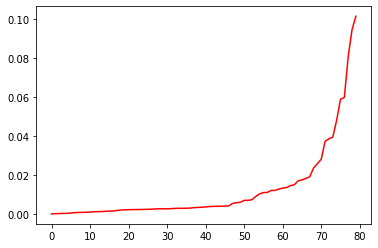

In [29]:
plt.figure()
plt.plot(range(len(feature_names)),
         tree_feature_importances[sorted_idx], 
         'r-')

In [30]:
with open('rf_select.csv', 'w') as f:
    f.write('\n'.join(feature_names[sorted_idx]))

In [31]:
var_30 = df.filter(items=feature_names[sorted_idx][:30])
var_30['fraud_label'] = y
var_30.to_csv('var_rf_30.csv', index=False)